In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
from matplotlib import pyplot as plt 

In [3]:
data = pd.read_csv('insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
data.shape

(1338, 7)

In [5]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
data.duplicated().sum()

1

In [7]:
data.drop_duplicates(inplace=True)

In [8]:
data.shape

(1337, 7)

In [9]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


In [11]:
data.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


In [12]:
def outlier_detection(df,col):
    sns.boxplot(df,x=col)
    plt.show()

In [13]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

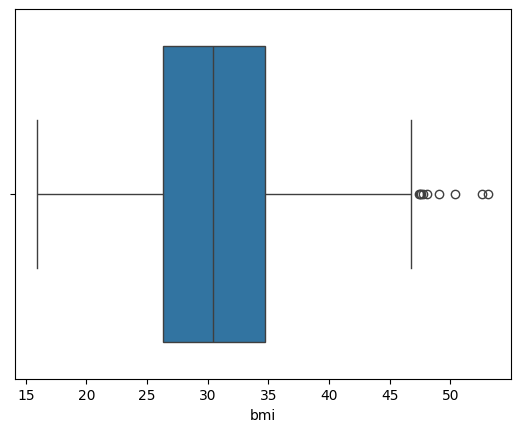

In [14]:
outlier_detection(data,'bmi')

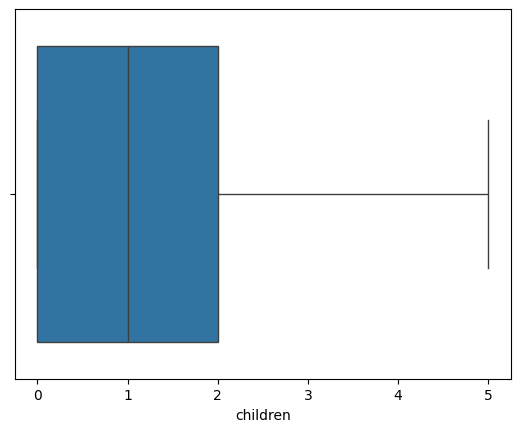

In [15]:
outlier_detection(data,'children')

In [16]:
Q1 = np.percentile(data['bmi'],0.25)
Q3 = np.percentile(data['bmi'],0.75)

IQR = Q3-Q1

lower = Q1-1.5*IQR
upper = Q3+1.5*IQR

print(lower,upper)

data = data[(data['bmi'] > lower) & (data['bmi'] < upper)]

16.560399999999998 18.338800000000003


In [17]:
data.head(20)

,age,sex,bmi,children,smoker,region,charges
28,23,male,17.385,1,no,northwest,2775.19215
128,32,female,17.765,2,yes,northwest,32734.18630
198,51,female,18.050,0,no,northwest,9644.25250
232,19,female,17.800,0,no,southwest,1727.78500
250,18,male,17.290,2,yes,northeast,12829.45510
380,27,female,17.955,2,yes,northeast,15006.57945
410,19,male,17.480,0,no,northwest,1621.34020
412,26,female,17.195,2,yes,northeast,14455.64405
428,21,female,16.815,1,no,northeast,3167.45585
680,21,female,17.400,1,no,southwest,2585.26900


In [18]:
num_col = ['age','bmi','children']

In [19]:
for i in num_col:
    print(f"column_name is {i}",data[i].skew())

column_name is age 0.804843521762562
column_name is bmi -0.05420690789591716
column_name is children 1.5331686389903394


In [20]:
def destribution_plot(data,col):
    sns.kdeplot(data,x=col,fill=True)
    plt.show()

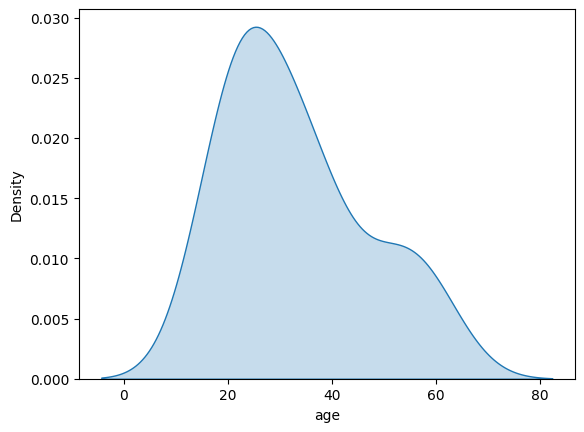

In [21]:
destribution_plot(data,'age')

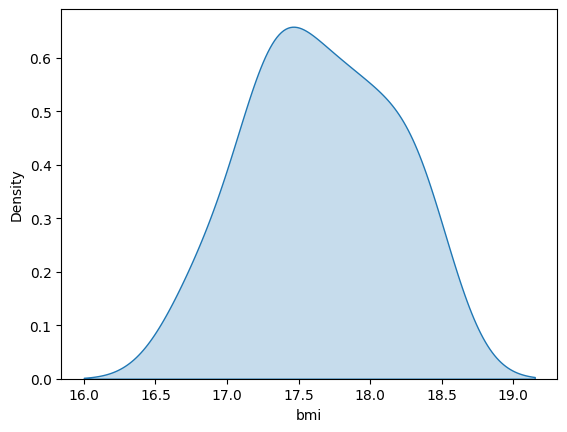

In [22]:
destribution_plot(data,'bmi')

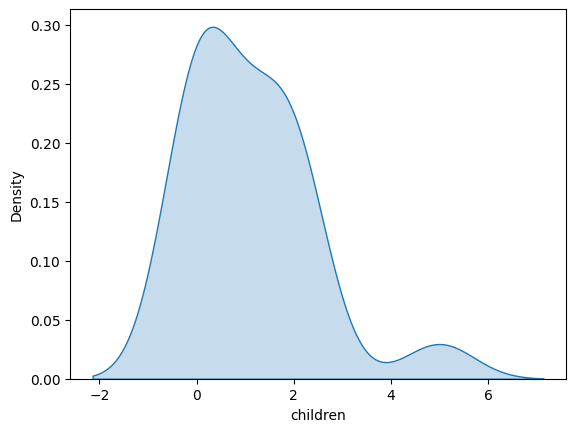

In [23]:
destribution_plot(data,'children')

In [24]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [25]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [26]:
one = OneHotEncoder()
scler = StandardScaler()

In [27]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [28]:
num_col

['age', 'bmi', 'children']

In [29]:
cat_col = ['sex','smoker','region']
num_col =['age', 'bmi', 'children']

perprocess = ColumnTransformer([
('num_pipeline',StandardScaler(),num_col),
('cat_pipeline',OneHotEncoder(),cat_col)
])

In [30]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [31]:
X = data.drop(columns=['charges'],axis = 1)
y = data['charges']

In [32]:
X = perprocess.fit_transform(X)

In [33]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=12)

In [34]:
from xgboost import XGBRegressor
from sklearn.metrics import r2_score,mean_absolute_error
xgb = XGBRegressor()
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)

print("XGBoost R^2 Score:", r2_score(y_test, xgb_pred))

XGBoost R^2 Score: 0.9574575328822394
